In [1]:
output_dir = "output/"
# run.py
from mesa.batchrunner import BatchRunner

from ecosystem.model import EcoModel

# fixed_params = {"width": 50,
#                 "height": 50,
#                 "b": 0.5,
#                 "m": 0.1}

# variable_params = {"b": range(0, 1, 2)}

# batch_run = BatchRunner(EcoModel,
#                         fixed_parameters=fixed_params,
#                         variable_parameters=None,  
#                         iterations=5,
#                         max_steps=100)
# batch_run.run_model()

In [2]:
from ecosystem.model import EcoModel
from mesa.datacollection import DataCollector
import time
start_time = time.time()

# fixed_params = {"width": 50,
#                 "height": 50,
#                 "b": 0.5,
#                 "m": 0.1}

model = EcoModel(100, 100, 0.4, 0.1)

for i in range(50):
    model.step()
    
print(time.time()-start_time)

Vegetated: 1001
Empty: 1641
Degraded: 7443
Vegetated: 916
Empty: 1985
Degraded: 7134
Vegetated: 881
Empty: 2130
Degraded: 7006
Vegetated: 864
Empty: 2258
Degraded: 6908
Vegetated: 834
Empty: 2335
Degraded: 6842
Vegetated: 823
Empty: 2335
Degraded: 6855
Vegetated: 810
Empty: 2342
Degraded: 6848
Vegetated: 810
Empty: 2336
Degraded: 6868
Vegetated: 796
Empty: 2314
Degraded: 6901
Vegetated: 785
Empty: 2265
Degraded: 6954
Vegetated: 781
Empty: 2217
Degraded: 7001
Vegetated: 782
Empty: 2190
Degraded: 7053
Vegetated: 757
Empty: 2128
Degraded: 7129
Vegetated: 743
Empty: 2072
Degraded: 7192
Vegetated: 736
Empty: 2054
Degraded: 7237
Vegetated: 709
Empty: 2005
Degraded: 7307
Vegetated: 688
Empty: 1983
Degraded: 7343
Vegetated: 674
Empty: 1943
Degraded: 7396
Vegetated: 661
Empty: 1903
Degraded: 7450
Vegetated: 647
Empty: 1854
Degraded: 7516
Vegetated: 630
Empty: 1831
Degraded: 7550
Vegetated: 619
Empty: 1792
Degraded: 7598
Vegetated: 610
Empty: 1742
Degraded: 7655
Vegetated: 603
Empty: 1710
Degrad

In [3]:
stats = model.datacollector.get_model_vars_dataframe()
stats

,Degraded,Empty,Vegetated,qplusminus,qplusplus
0,7991,1008,1001,1.000000,1.000000
1,7443,1641,916,0.189062,0.107806
2,7134,1985,881,0.191310,0.116345
3,7006,2130,864,0.185681,0.143229
4,6908,2258,834,0.183237,0.170564
5,6842,2335,823,0.177302,0.188943
6,6855,2335,810,0.174732,0.204321
7,6848,2342,810,0.174851,0.211111
8,6868,2336,796,0.172303,0.227387
9,6901,2314,785,0.167567,0.242994


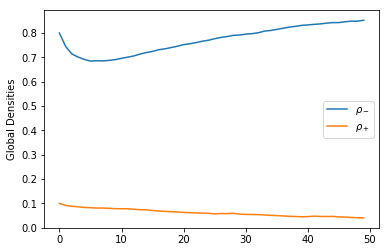

In [7]:
# Figure 3a 
# Plot the global densities at each time step

from matplotlib import pyplot as plt
total = (stats.Degraded+stats.Vegetated+stats.Empty)
plt.plot(stats.Degraded/(total), label = r'$\rho_-$')
plt.plot(stats.Vegetated/(total), label = r'$\rho_+$')
plt.legend()
plt.ylabel('Global Densities')
plt.savefig(output_dir+"Global_densities.png", format = 'png' )
plt.show()

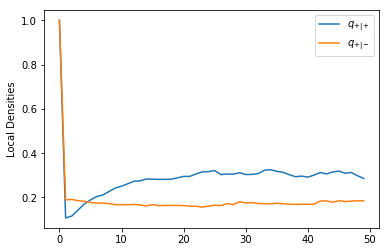

In [5]:
# Plot local densities
# q+|+ number of vegetated neighbours of vegetates sites
# q-|+ number of vegetated neighbours of degraded sites

from matplotlib import pyplot as plt

plt.plot(stats.qplusplus, label = r'$q_{+|+}$')
plt.plot(stats.qplusminus, label = r'$q_{+|-}$')
plt.legend()
plt.ylabel('Local Densities')
plt.savefig(output_dir + "Local_densities.png", format = 'png' )
plt.show()



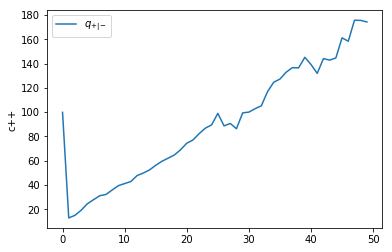

In [8]:
from matplotlib import pyplot as plt
plt.plot(stats.qplusplus/(stats.Vegetated/(total))**2, label = r'$q_{+|-}$')
plt.legend()
plt.ylabel('c++')
plt.savefig(output_dir + "Local_densities.png", format = 'png' )
plt.show()
